# **SAVE THE ATTACK**

**Eploratory Data Analysis(EDA)**

*   Dataset Observation
*   Assumptions
*   Correlation
*   Outliers

*Analysis By: Ashutosh Soni*

Kaggle Competition: https://www.kaggle.com/c/save-the-attack-contest

# Preprocessing

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metric
import sklearn.preprocessing as preprocessing
from scipy.linalg import svd
import missingno as msno

**Importing Dataset**

In [ ]:
train_df=pd.read_csv("save-the-attack-contest/train_data.csv")
train_df.head()

/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
2,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
3,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
4,0000161e8abf8d8b89c5ab8787fd712b,win8defender,1.1.15100.1,4.18.1807.18075,1.273.845.0,0,7.0,0,NaN,43927.0,...,63175.0,1,NaN,0.0,0,0,0.0,0.0,10.0,1


In [ ]:
train_df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,7.137943e+06,7.112075e+06,7.137943e+06,346823.000000,7.109053e+06,7.109053e+06,7.109053e+06,7.137943e+06,7.137943e+06,6.877687e+06,...,7.009684e+06,7.137943e+06,2609389.0,7.125230e+06,7.137943e+06,7.137943e+06,7.080919e+06,6.894931e+06,6.894931e+06,7.137943e+06
mean,8.265687e-06,6.845304e+00,1.733188e-02,1659.433671,4.783867e+04,1.326831e+00,1.021001e+00,9.879608e-01,1.080636e+02,8.126971e+04,...,3.303159e+04,4.860515e-01,0.0,7.044264e-03,1.255296e-01,3.803589e-02,5.740780e-02,2.835837e-01,7.882745e+00,4.996784e-01
std,2.874999e-03,1.026156e+00,1.305048e-01,998.550255,1.403389e+04,5.229457e-01,1.676663e-01,1.090607e-01,6.304617e+01,4.892680e+04,...,2.120963e+04,4.998054e-01,0.0,8.363398e-02,3.313185e-01,1.912829e-01,2.326202e-01,4.507372e-01,4.550509e+00,4.999999e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,788.000000,4.948000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.682500e+04,...,1.315600e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,1632.000000,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,8.237300e+04,...,3.307000e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,2373.000000,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.237000e+05,...,5.243600e+04,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,3.500000e+01,1.000000e+00,3213.000000,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,...,7.210500e+04,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


**Removing unnecessary columns**

Following are some attributes which are not neccessary for the training:


*   'MachineIdentifier' (Identifier for the data)
*   'DefaultBrowsersIdentifier' (95% values are NaN)
*   'OrganizationIdentifier' (more than 30% values are NaN)
*   'PuaMode' (100% values are NaN)
*   'SmartScreen' (36% values are NaN)
*   'Census_ProcessorClass' (100% values are NaN)
*   'Census_InternalBatteryType' (more than 70% values are NaN)
*   'Census_IsFlightingInternal' (more than 80% values are NaN)
*   'Census_ThresholdOptIn' (more than 60% values are NaN)
*   'Census_IsWIMBootEnabled' (more than 60% values are NaN)
*   'SMode' (All the values are same i.e. 0)



In [ ]:
cols_to_drop=['MachineIdentifier', 'DefaultBrowsersIdentifier', 'OrganizationIdentifier', 'PuaMode', 'SmartScreen', 'Census_ProcessorClass', 
              'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled',
              'SMode'
              ]

In [ ]:
train_df.drop(axis='columns', labels=cols_to_drop, inplace=True)
train_df.shape

(7137943, 72)

**Handling missing values and categorical attributes of the data set**

We have both continuous valued and categorical valued attributes in the dataset, hence we need to treat **missing values** for these two type separately:


1.   Continuous valued attributes: missing values should be filled by median
2.   Categorical values attributes: missing values should be filled by adding new category


**Categorical valued** attributes are encoded using LabelEncoder which assigns definite integer values for each of the values attribute contains.


In [ ]:
## check for the NaN values
for col in train_df.columns:
  print(col, ": ", train_df[col].isna().sum())

ProductName :  0
EngineVersion :  0
AppVersion :  0
AvSigVersion :  0
IsBeta :  0
RtpStateBitfield :  25868
IsSxsPassiveMode :  0
AVProductStatesIdentifier :  28890
AVProductsInstalled :  28890
AVProductsEnabled :  28890
HasTpm :  0
CountryIdentifier :  0
CityIdentifier :  260256
GeoNameIdentifier :  164
LocaleEnglishNameIdentifier :  0
Platform :  0
Processor :  0
OsVer :  0
OsBuild :  0
OsSuite :  0
OsPlatformSubRelease :  0
OsBuildLab :  18
SkuEdition :  0
IsProtected :  28753
AutoSampleOptIn :  0
IeVerIdentifier :  47072
Firewall :  73164
UacLuaenable :  8743
Census_MDC2FormFactor :  0
Census_DeviceFamily :  0
Census_OEMNameIdentifier :  76396
Census_OEMModelIdentifier :  81782
Census_ProcessorCoreCount :  33065
Census_ProcessorManufacturerIdentifier :  33071
Census_ProcessorModelIdentifier :  33096
Census_PrimaryDiskTotalCapacity :  42455
Census_PrimaryDiskTypeName :  10300
Census_SystemVolumeTotalCapacity :  42443
Census_HasOpticalDiskDrive :  0
Census_TotalPhysicalRAM :  64503
C

In [ ]:
# Label encoding for the categorical valued attributes
lEncoder=LabelEncoder()
categorical_columns=[]
for col in train_df.columns:
    if(col!='HasDetections'):
        if(len(train_df[col].unique())!=3 and train_df[col].dtype!='object'):
            train_df[col].fillna(train_df[col].median(), inplace=True)
        else:
            categorical_columns.append(col)
            train_df[col]=lEncoder.fit_transform(train_df[col])
print(categorical_columns)

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IsProtected', 'Firewall', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_IsVirtualDevice', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer']


In [ ]:
train_df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,4,64,58,7751,0,7.0,0,53447.0,1.0,1.0,...,628.0,36144.0,0,0,0,0,0,0,10.0,0
1,4,64,58,7673,0,7.0,0,53447.0,1.0,1.0,...,355.0,20050.0,0,0,0,0,0,0,3.0,1
2,4,64,58,7632,0,7.0,0,53447.0,1.0,1.0,...,355.0,19844.0,0,0,0,0,0,0,1.0,1
3,4,64,58,7552,0,7.0,0,53447.0,1.0,1.0,...,93.0,51039.0,0,0,0,0,0,0,15.0,1
4,4,64,58,7934,0,7.0,0,43927.0,2.0,1.0,...,556.0,63175.0,1,0,0,0,0,0,10.0,1


In [ ]:
## Check again for missing values after removal
for col in train_df.columns:
  print(col, ": ", train_df[col].isna().sum())

ProductName :  0
EngineVersion :  0
AppVersion :  0
AvSigVersion :  0
IsBeta :  0
RtpStateBitfield :  0
IsSxsPassiveMode :  0
AVProductStatesIdentifier :  0
AVProductsInstalled :  0
AVProductsEnabled :  0
HasTpm :  0
CountryIdentifier :  0
CityIdentifier :  0
GeoNameIdentifier :  0
LocaleEnglishNameIdentifier :  0
Platform :  0
Processor :  0
OsVer :  0
OsBuild :  0
OsSuite :  0
OsPlatformSubRelease :  0
OsBuildLab :  0
SkuEdition :  0
IsProtected :  0
AutoSampleOptIn :  0
IeVerIdentifier :  0
Firewall :  0
UacLuaenable :  0
Census_MDC2FormFactor :  0
Census_DeviceFamily :  0
Census_OEMNameIdentifier :  0
Census_OEMModelIdentifier :  0
Census_ProcessorCoreCount :  0
Census_ProcessorManufacturerIdentifier :  0
Census_ProcessorModelIdentifier :  0
Census_PrimaryDiskTotalCapacity :  0
Census_PrimaryDiskTypeName :  0
Census_SystemVolumeTotalCapacity :  0
Census_HasOpticalDiskDrive :  0
Census_TotalPhysicalRAM :  0
Census_ChassisTypeName :  0
Census_InternalPrimaryDiagonalDisplaySizeInInche

In [ ]:
## check for the types of all the attributes(i.e. it must be in int or float)
for col in train_df.columns:
    print(train_df[col].dtype)

int64
int64
int64
int64
int64
float64
int64
float64
float64
float64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
float64
int64
int64
float64
float64
float64
float64
float64
float64
int64
float64
int64
float64
int64
float64
float64
float64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
float64
int64


In [ ]:
train_df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,4,64,58,7751,0,7.0,0,53447.0,1.0,1.0,...,628.0,36144.0,0,0,0,0,0,0,10.0,0
1,4,64,58,7673,0,7.0,0,53447.0,1.0,1.0,...,355.0,20050.0,0,0,0,0,0,0,3.0,1
2,4,64,58,7632,0,7.0,0,53447.0,1.0,1.0,...,355.0,19844.0,0,0,0,0,0,0,1.0,1
3,4,64,58,7552,0,7.0,0,53447.0,1.0,1.0,...,93.0,51039.0,0,0,0,0,0,0,15.0,1
4,4,64,58,7934,0,7.0,0,43927.0,2.0,1.0,...,556.0,63175.0,1,0,0,0,0,0,10.0,1


**Remove duplication**

There may be the possibilities that dataset have the duplicated rows which we can remove as they do not help in the learning.

In [ ]:
train_df.index[train_df.duplicated()]

Int64Index([  22591,   73754,  120321,  142721,  170311,  209891,  226245,
             226441,  233182,  235615,
            ...
            7127188, 7127529, 7128428, 7129248, 7130004, 7131680, 7134251,
            7136733, 7137372, 7137530],
           dtype='int64', length=3942)

In [ ]:
train_df.drop(axis='rows', labels=train_df.index[train_df.duplicated()], inplace=True)
train_df.shape

(7134001, 72)

In [ ]:
data_df_X=train_df.drop(axis='columns', labels=['HasDetections'])
data_df_Y=train_df['HasDetections']
print(data_df_X.shape, data_df_Y.shape)

(7134001, 71) (7134001,)


**Data transformation**

We will transform two types of data(i.e. continuous valued and categorical valued) separately. We transformed the categorical valued data using **label encoding** and now we will transform only continuous valued data using **Standardisation**.

In [ ]:
data_df_X_cont=data_df_X.drop(axis='columns', labels=categorical_columns)
data_df_X_cat=data_df_X[categorical_columns]
print(data_df_X_cont.shape)
print(data_df_X_cat.shape)

(7134001, 40)
(7134001, 31)


**Standardisation**

In [ ]:
standardScaler = preprocessing.StandardScaler()
data_df_X_cont_scaled=standardScaler.fit_transform(data_df_X_cont)
data_df_X_cont_scaled=pd.DataFrame(data_df_X_cont_scaled, index=data_df_X_cont.index, columns=data_df_X_cont.columns)
data_df_X_cont_scaled.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Wdft_RegionIdentifier
count,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,...,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06
mean,7.539680e-19,5.181165e-18,3.606098e-17,2.026142e-16,1.002120e-16,6.033557e-16,2.914081e-16,4.467933e-17,-7.864623e-17,-7.491773e-17,...,-1.498175e-17,9.685053e-18,3.087384e-17,-5.786729e-18,-2.150353e-17,2.942965e-17,6.617389e-17,7.939074e-18,5.657648e-17,-9.439440e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.875817e-03,-6.681686e+00,-1.328433e-01,-3.415148e+00,-2.537742e+00,-6.099795e+00,-9.061674e+00,-1.698145e+00,-1.692861e+00,-1.888546e+00,...,-3.319148e-01,-1.333767e+00,-1.299228e+00,-2.329736e-02,-1.833436e+00,-1.571502e+00,-9.724706e-01,-3.789292e-01,-1.988710e-01,-1.549405e+00
25%,-2.875817e-03,1.505094e-01,-1.328433e-01,1.157205e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-9.050776e-01,-9.031517e-01,-9.032707e-01,...,-2.749520e-01,-6.458398e-01,-6.547526e-01,-2.329736e-02,-1.196435e+00,-9.389137e-01,-9.724706e-01,-3.789292e-01,-1.988710e-01,-1.103859e+00
50%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.754554e-01,2.214602e-02,1.267895e-01,...,-2.347028e-01,-5.475645e-01,-5.880827e-01,-2.329736e-02,4.324672e-01,1.738410e-03,-9.724706e-01,-3.789292e-01,-1.988710e-01,4.555519e-01
75%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,1.290938e+00,-1.250279e-01,1.103549e-01,8.555324e-01,8.320314e-01,1.089672e+00,...,-1.453360e-01,5.334633e-01,6.564217e-01,-2.329736e-02,6.872675e-01,9.148908e-01,1.028309e+00,-3.789292e-01,-1.988710e-01,6.783249e-01
max,3.477273e+02,2.747929e+01,7.527665e+00,1.616288e+00,1.086264e+01,2.377404e+01,1.103549e-01,1.807213e+00,1.804219e+00,1.414365e+00,...,1.390401e+01,2.400693e+00,2.256499e+00,4.292332e+01,3.126071e+00,1.858921e+00,1.028309e+00,2.639015e+00,5.028386e+00,1.569417e+00


In [ ]:
print(data_df_X_cont_scaled.shape)
print(data_df_X_cat.shape)

(7134001, 40)
(7134001, 31)


**Merging after preprocessing for training** 

In [ ]:
data_df_X_scaled=pd.concat([data_df_X_cont_scaled, data_df_X_cat], axis=1)
data_df_X_scaled.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer
0,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-1.254027,0.972887,-1.507871,...,15,6,5,1,2,0,6,0,0,0
1,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-0.318208,-1.261757,-0.589774,...,15,6,2,1,1,0,6,0,0,0
2,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-1.428502,-0.914749,1.201635,...,2,7,2,1,2,0,6,0,0,0
3,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-0.175455,-1.409838,-0.489007,...,15,6,2,1,2,0,6,0,0,0
4,-0.002876,0.150509,-0.132843,-0.280563,1.290938,-0.125028,0.110355,-0.476821,-0.001965,-0.903271,...,2,2,2,1,2,0,6,0,0,0


In [ ]:
data_df_X_scaled.shape

(7134001, 71)

In [ ]:
train_df=pd.concat([data_df_X_scaled, data_df_Y], axis=1)
train_df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
count,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,...,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06
mean,7.539680e-19,5.181165e-18,3.606098e-17,2.026142e-16,1.002120e-16,6.033557e-16,2.914081e-16,4.467933e-17,-7.864623e-17,-7.491773e-17,...,5.242018e+00,2.996487e+00,9.403845e-01,1.303684e+00,3.598808e-02,5.933114e+00,1.058368e-02,7.292822e-02,3.419728e-01,4.997794e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.136867e+00,1.399012e+00,3.548188e-01,1.136266e+00,2.658435e-01,5.833751e-01,1.184689e-01,2.890889e-01,5.413309e-01,5.000000e-01
min,-2.875817e-03,-6.681686e+00,-1.328433e-01,-3.415148e+00,-2.537742e+00,-6.099795e+00,-9.061674e+00,-1.698145e+00,-1.692861e+00,-1.888546e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.875817e-03,1.505094e-01,-1.328433e-01,1.157205e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-9.050776e-01,-9.031517e-01,-9.032707e-01,...,3.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.754554e-01,2.214602e-02,1.267895e-01,...,6.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,1.290938e+00,-1.250279e-01,1.103549e-01,8.555324e-01,8.320314e-01,1.089672e+00,...,7.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,3.477273e+02,2.747929e+01,7.527665e+00,1.616288e+00,1.086264e+01,2.377404e+01,1.103549e-01,1.807213e+00,1.804219e+00,1.414365e+00,...,8.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,9.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00


In [ ]:
train_df.shape

(7134001, 72)

**Data Correlation**

We can check the correlation of every pairs of attributes and conclude based on one of the following intuitions: 


*   Higher correlation among the features indicate lower correlation between the feature set and dependent set.
*   Higher correlation between the feature set and dependent set indicates higher correlation between features and dependent set.
*   Higher number of features indicates higher correlation between feature set and dependent set.



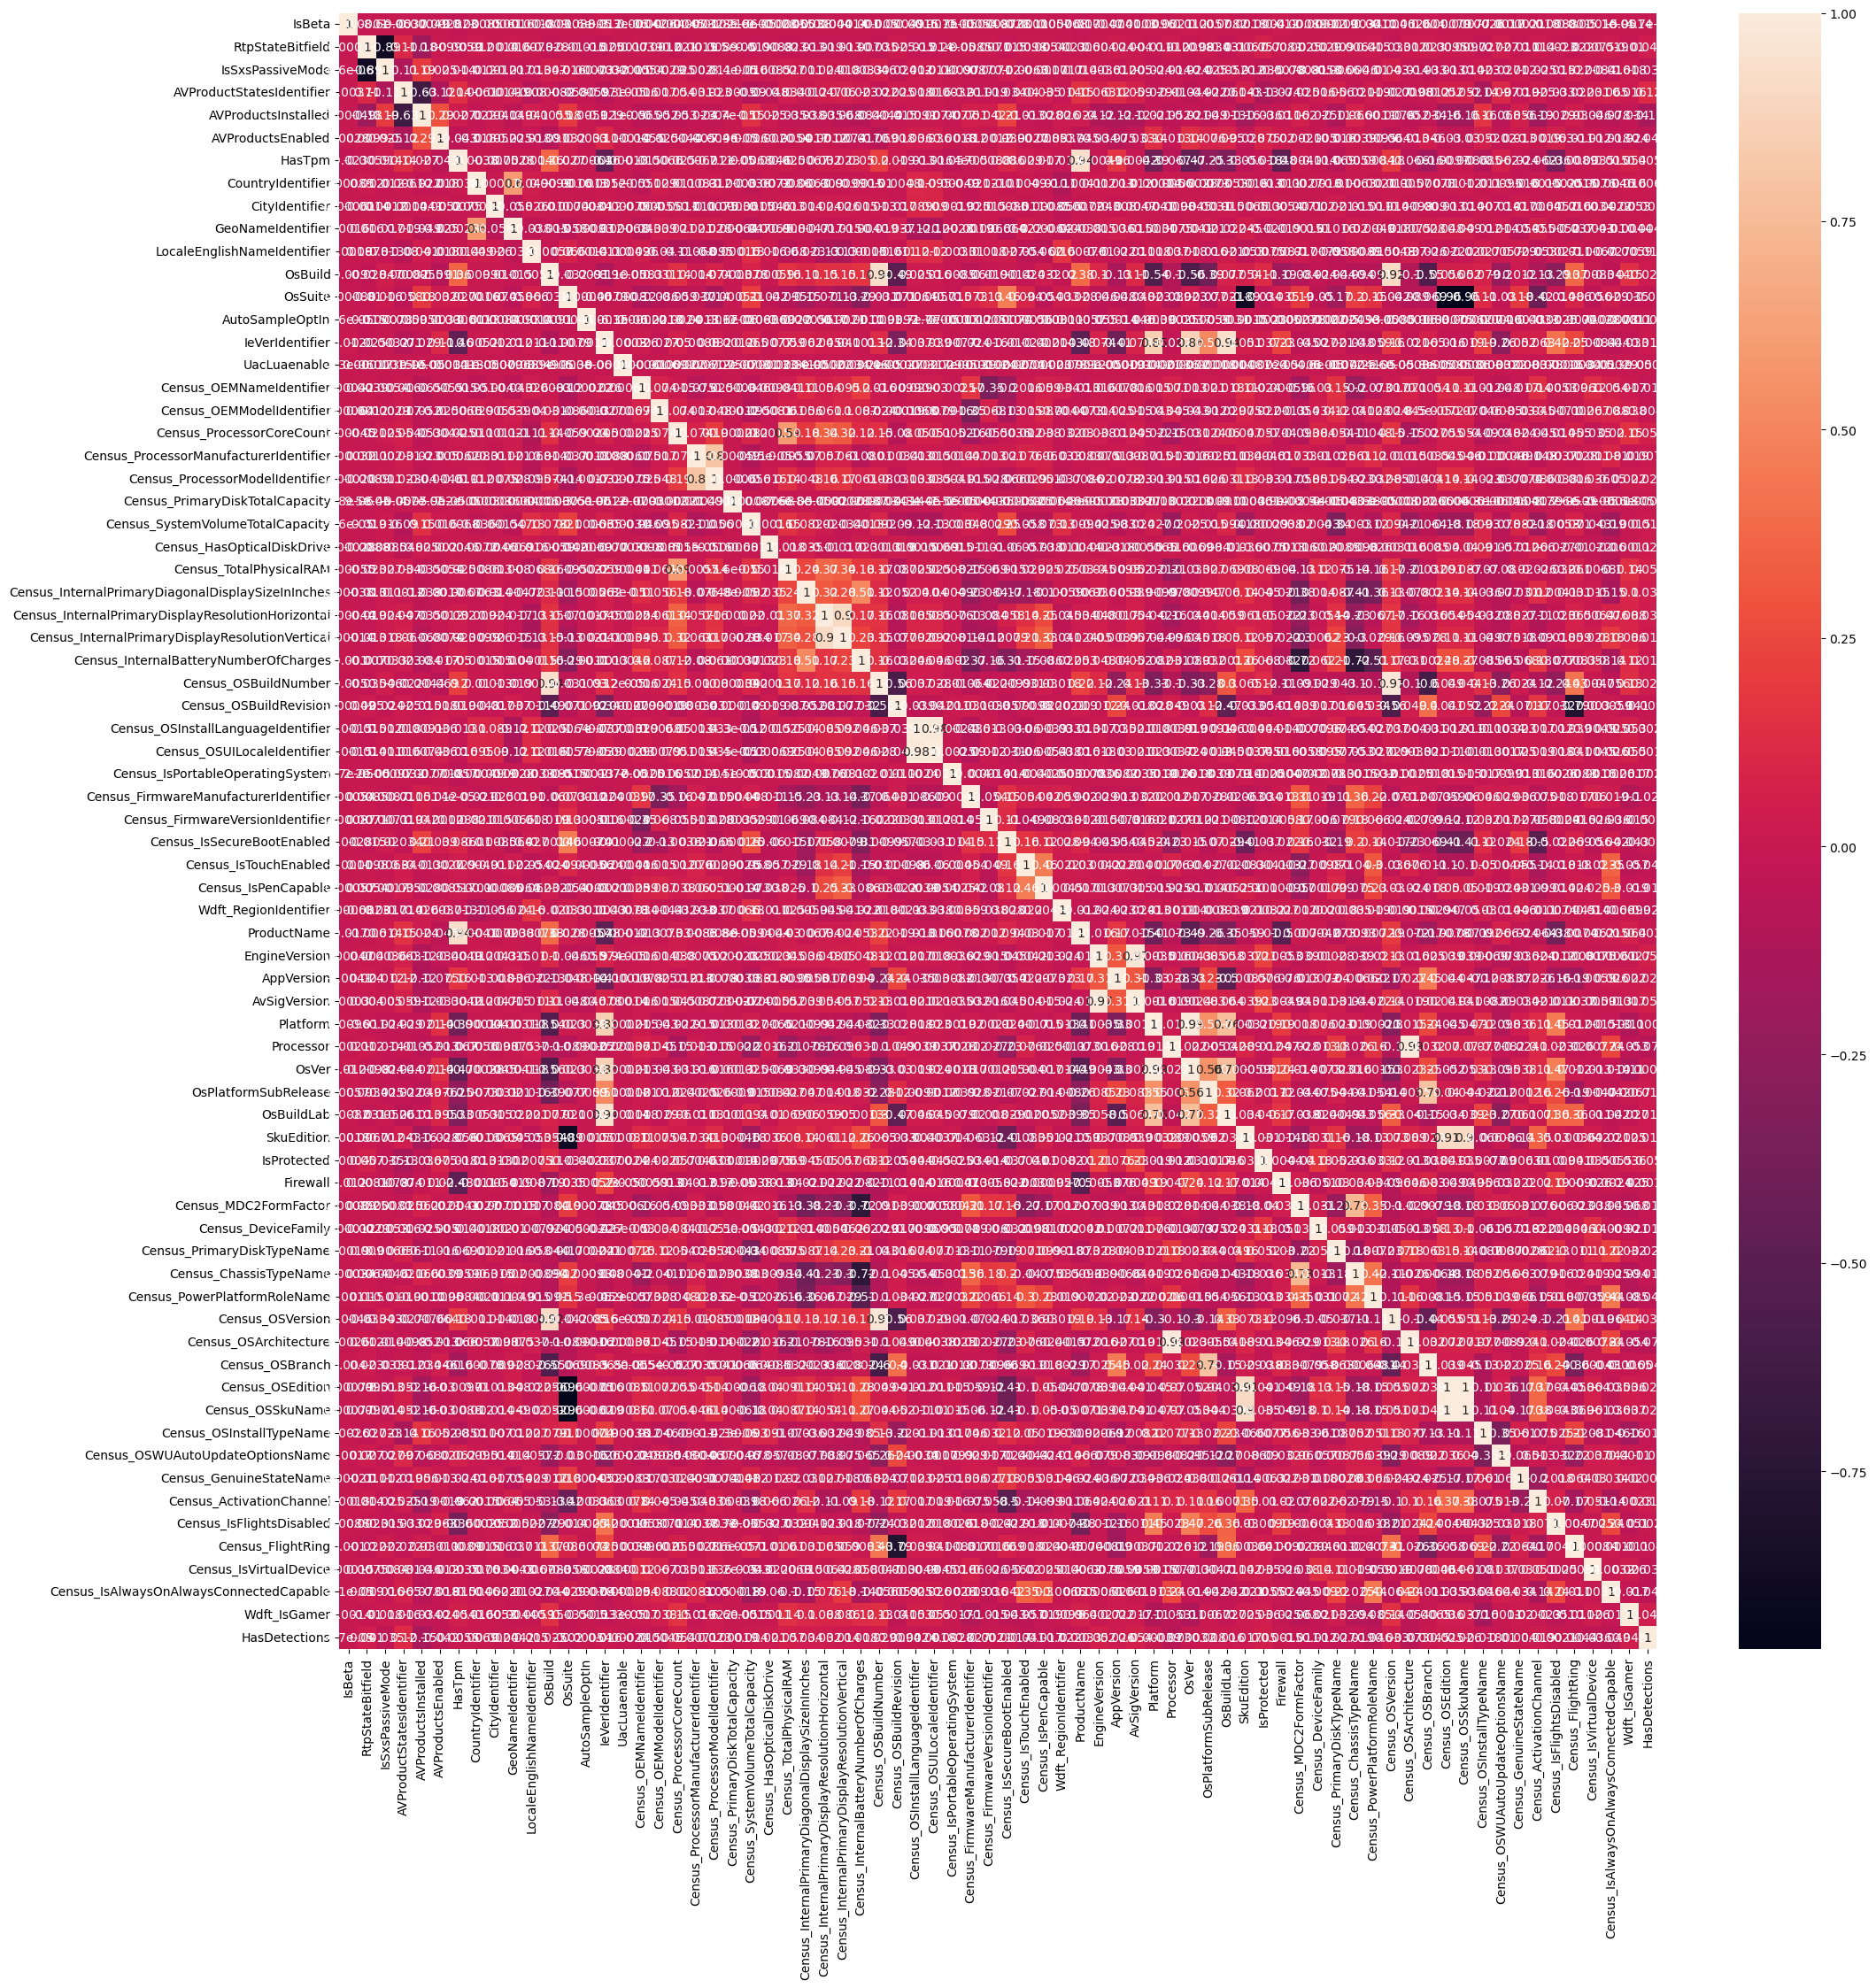

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(train_df.corr(), annot=True)
plt.savefig('correlation')
plt.show()

**Outlier Removal**

<Figure size 8100x8100 with 0 Axes>

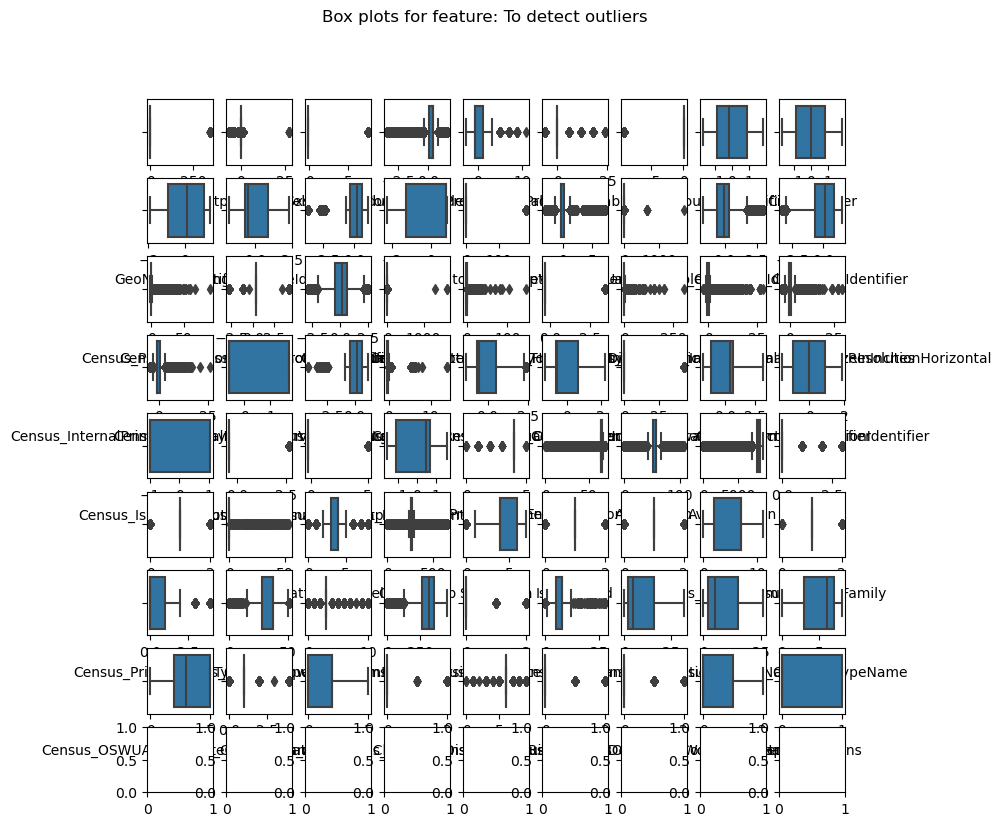

In [ ]:
plt.figure(figsize=(81, 81))
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.suptitle("Box plots for feature: To detect outliers")
i=0
j=0
for col in train_df.columns:
    sns.boxplot(x=train_df[col], ax=ax[i, j])
    j+=1
    if(j==9):
        i+=1
        j=0
plt.savefig('boxplot: before outlier removal')
plt.show()

In [ ]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [ ]:
for col in train_df.columns:
    if(col!='HasDetections'):
        outlierRem = OutlierRemoval(train_df[col].quantile(0.25), train_df[col].quantile(0.75))
        train_df[col] = train_df[col].apply(outlierRem.removeOutlier)
train_df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
count,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,7.134001e+06,...,7.134001e+06,7.134001e+06,7134001.0,7.134001e+06,7134001.0,7134001.0,7134001.0,7134001.0,7.134001e+06,7.134001e+06
mean,-2.875817e-03,1.505094e-01,-1.328433e-01,2.629827e-01,-1.111466e-03,-1.250279e-01,1.103549e-01,4.467933e-17,-7.864623e-17,-7.491773e-17,...,5.242018e+00,2.996487e+00,1.0,1.303684e+00,0.0,6.0,0.0,0.0,3.419728e-01,4.997794e-01
std,2.341877e-17,2.137179e-15,2.053913e-15,3.083590e-01,9.946427e-01,9.992008e-16,1.207368e-15,1.000000e+00,1.000000e+00,1.000000e+00,...,2.136867e+00,1.399012e+00,0.0,1.136266e+00,0.0,0.0,0.0,0.0,5.413309e-01,5.000000e-01
min,-2.875817e-03,1.505094e-01,-1.328433e-01,-3.089300e-01,-2.537742e+00,-1.250279e-01,1.103549e-01,-1.698145e+00,-1.692861e+00,-1.888546e+00,...,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.0,6.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,-2.875817e-03,1.505094e-01,-1.328433e-01,1.157205e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-9.050776e-01,-9.031517e-01,-9.032707e-01,...,3.000000e+00,2.000000e+00,1.0,0.000000e+00,0.0,6.0,0.0,0.0,0.000000e+00,0.000000e+00
50%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.754554e-01,2.214602e-02,1.267895e-01,...,6.000000e+00,3.000000e+00,1.0,2.000000e+00,0.0,6.0,0.0,0.0,0.000000e+00,0.000000e+00
75%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,1.290938e+00,-1.250279e-01,1.103549e-01,8.555324e-01,8.320314e-01,1.089672e+00,...,7.000000e+00,5.000000e+00,1.0,2.000000e+00,0.0,6.0,0.0,0.0,1.000000e+00,1.000000e+00
max,-2.875817e-03,1.505094e-01,-1.328433e-01,8.234714e-01,4.162448e+00,-1.250279e-01,1.103549e-01,1.807213e+00,1.804219e+00,1.414365e+00,...,8.000000e+00,5.000000e+00,1.0,5.000000e+00,0.0,6.0,0.0,0.0,2.000000e+00,1.000000e+00


<Figure size 8100x8100 with 0 Axes>

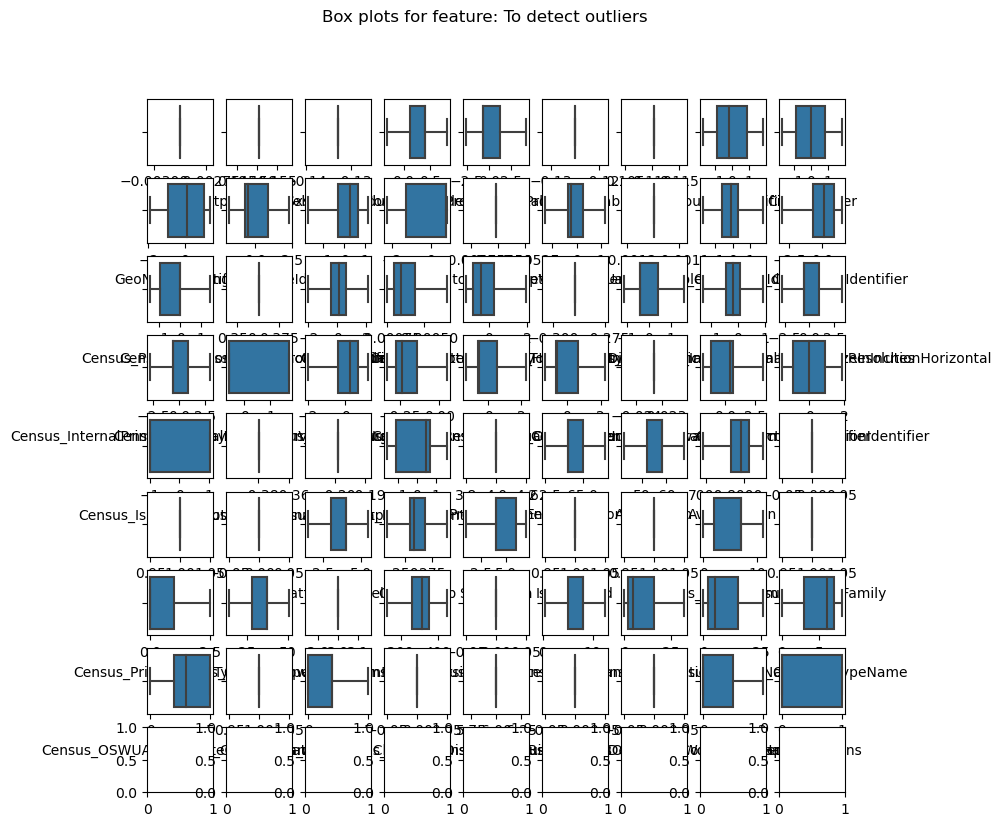

In [ ]:
plt.figure(figsize=(81, 81))
fig, ax = plt.subplots(9, 9, figsize=(9, 9))
fig.suptitle("Box plots for feature: To detect outliers")
i=0
j=0
for col in train_df.columns:
    sns.boxplot(x=train_df[col], ax=ax[i, j])
    j+=1
    if(j==9):
        i+=1
        j=0
plt.savefig('boxplot: after outlier removal')
plt.show()

**Dividing dataset into data and labels for training**

In [ ]:
df_X = train_df.drop(axis='columns', labels=['HasDetections']).to_numpy()
df_Y = train_df[['HasDetections']].to_numpy()
print(df_X.shape, df_Y.shape)

(7134001, 71) (7134001, 1)


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_X, df_Y, train_size=0.8)
print(x_train.shape, y_train.shape)

(5707200, 71) (5707200, 1)


# **Model training**

**Logistic regression**

Hyperparam: 

    - max_iterations=100
    - class_weight='balanced'
    - solver='saga'


In [ ]:
model=linear_model.LogisticRegression(max_iter=100, verbose=2, class_weight='balanced', solver='saga')
model.fit(x_train, y_train)

/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.5min remaining: 

LogisticRegression(max_iter=500, verbose=2)

In [ ]:
y_pred_hat = model.predict_proba(x_test)[:, -1]
score=metric.roc_auc_score(y_test, y_pred_hat)
print(score)

0.6101926088588959


**Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_nb=BernoulliNB()
model_nb.fit(x_train, y_train)

/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
y_pred_hat_nb = model_nb.predict_proba(x_test)[:, -1]
score=metric.roc_auc_score(y_test, y_pred_hat_nb)
print(score)

0.5901721716275661


# **Test data preparation for submission**

**Preprocessing**

**Importing test dataset**

In [ ]:
test_df=pd.read_csv("save-the-attack-contest/test_data.csv")
test_df.head()

/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0
1,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0
2,00001a18d69bb60bda9779408dcf02ac,win8defender,1.1.15100.1,4.18.1807.18075,1.273.973.0,0,7.0,0,NaN,46413.0,...,556.0,63555.0,1,0.0,0.0,0,0,0.0,1.0,8.0
3,00001b924fcc6922321cfadbafd8a91a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1826.0,0,7.0,0,NaN,47238.0,...,628.0,15816.0,1,NaN,0.0,0,0,0.0,0.0,15.0
4,000028150912f45b1dc667164de489ef,mse,1.1.15200.1,4.9.218.0,1.275.300.0,0,7.0,0,NaN,29199.0,...,803.0,64575.0,0,0.0,0.0,0,0,0.0,0.0,3.0


In [ ]:
ids = test_df['MachineIdentifier']
ids.shape

(1783540,)

**Remove unnecessary attributes**

we are using the same columns which are identified in the training data assuming that train and test both have same distribution

In [ ]:
test_df.drop(axis='columns', labels=cols_to_drop, inplace=True)
test_df.shape

(1783540, 71)

**Handling missing values and categorical attributes**

In [ ]:
print("NAN counts for each columns after partial removal of missing values")
for col in test_df.columns:
  print(col, ": ", test_df[col].isna().sum())

NAN counts for each columns after partial removal of missing values
ProductName :  0
EngineVersion :  0
AppVersion :  0
AvSigVersion :  0
IsBeta :  0
RtpStateBitfield :  6450
IsSxsPassiveMode :  0
AVProductStatesIdentifier :  7331
AVProductsInstalled :  7331
AVProductsEnabled :  7331
HasTpm :  0
CountryIdentifier :  0
CityIdentifier :  65153
GeoNameIdentifier :  49
LocaleEnglishNameIdentifier :  0
Platform :  0
Processor :  0
OsVer :  0
OsBuild :  0
OsSuite :  0
OsPlatformSubRelease :  0
OsBuildLab :  3
SkuEdition :  0
IsProtected :  7291
AutoSampleOptIn :  0
IeVerIdentifier :  11822
Firewall :  18186
UacLuaenable :  2095
Census_MDC2FormFactor :  0
Census_DeviceFamily :  0
Census_OEMNameIdentifier :  19082
Census_OEMModelIdentifier :  20451
Census_ProcessorCoreCount :  8241
Census_ProcessorManufacturerIdentifier :  8242
Census_ProcessorModelIdentifier :  8247
Census_PrimaryDiskTotalCapacity :  10561
Census_PrimaryDiskTypeName :  2544
Census_SystemVolumeTotalCapacity :  10559
Census_Has

In [ ]:
for col in test_df.columns:
    if(len(test_df[col].unique())!=3 and test_df[col].dtype!='object'):
        test_df[col].fillna(test_df[col].median(), inplace=True)
    else:
        test_df[col]=lEncoder.fit_transform(test_df[col])

In [ ]:
print("NAN counts for each columns after partial removal of missing values")
for col in test_df.columns:
  print(col, ": ", test_df[col].isna().sum())

NAN counts for each columns after partial removal of missing values
ProductName :  0
EngineVersion :  0
AppVersion :  0
AvSigVersion :  0
IsBeta :  0
RtpStateBitfield :  0
IsSxsPassiveMode :  0
AVProductStatesIdentifier :  0
AVProductsInstalled :  0
AVProductsEnabled :  0
HasTpm :  0
CountryIdentifier :  0
CityIdentifier :  0
GeoNameIdentifier :  0
LocaleEnglishNameIdentifier :  0
Platform :  0
Processor :  0
OsVer :  0
OsBuild :  0
OsSuite :  0
OsPlatformSubRelease :  0
OsBuildLab :  0
SkuEdition :  0
IsProtected :  0
AutoSampleOptIn :  0
IeVerIdentifier :  0
Firewall :  0
UacLuaenable :  0
Census_MDC2FormFactor :  0
Census_DeviceFamily :  0
Census_OEMNameIdentifier :  0
Census_OEMModelIdentifier :  0
Census_ProcessorCoreCount :  0
Census_ProcessorManufacturerIdentifier :  0
Census_ProcessorModelIdentifier :  0
Census_PrimaryDiskTotalCapacity :  0
Census_PrimaryDiskTypeName :  0
Census_SystemVolumeTotalCapacity :  0
Census_HasOpticalDiskDrive :  0
Census_TotalPhysicalRAM :  0
Census_C

In [ ]:
for col in test_df.columns:
    print(test_df[col].dtype)

int64
int64
int64
int64
int64
float64
int64
float64
float64
float64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
float64
int64
int64
float64
float64
float64
float64
float64
float64
int64
float64
int64
float64
int64
float64
float64
float64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
float64


**Standardisation for continuous valued attributes**

In [ ]:
test_df_cont=test_df.drop(axis='columns', labels=categorical_columns)
test_df_cat=test_df[categorical_columns]
print(test_df_cont.shape)
print(test_df_cat.shape)

(1783540, 40)
(1783540, 31)


In [ ]:
test_df_cont_scaled=standardScaler.transform(test_df_cont)
test_df_cont_scaled=pd.DataFrame(test_df_cont_scaled, index=test_df_cont.index, columns=data_df_X_cont.columns)
test_df_cont_scaled.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Wdft_RegionIdentifier
count,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,...,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06
mean,-1.316087e-03,2.050131e-04,2.606383e-07,7.105333e-04,-8.062851e-04,-1.086495e-03,4.010108e-04,-1.128247e-03,-3.056638e-04,-7.556591e-04,...,1.999578e-04,4.284685e-04,3.466322e-04,5.412678e-04,-1.571225e-03,-9.138814e-04,-2.752009e-04,1.167708e-04,8.682232e-04,7.502773e-04
std,7.364531e-01,9.992948e-01,1.000001e+00,9.992380e-01,9.996598e-01,9.963949e-01,9.982038e-01,1.000068e+00,9.995991e-01,1.000138e+00,...,1.000935e+00,1.000313e+00,1.000261e+00,1.011544e+00,1.000442e+00,9.993996e-01,9.999926e-01,1.000132e+00,1.002094e+00,9.996167e-01
min,-2.875817e-03,-6.681686e+00,-1.328433e-01,-3.414220e+00,-6.234021e-01,-6.099795e+00,-9.061674e+00,-1.698145e+00,-1.692820e+00,-1.888546e+00,...,-3.319148e-01,-1.333767e+00,-1.321451e+00,-2.329736e-02,-1.828886e+00,-1.571407e+00,-9.724706e-01,-3.789292e-01,-1.988710e-01,-1.549405e+00
25%,-2.875817e-03,1.505094e-01,-1.328433e-01,1.157205e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-9.050776e-01,-9.012153e-01,-9.032707e-01,...,-2.756341e-01,-6.458398e-01,-6.547526e-01,-2.329736e-02,-1.196435e+00,-9.389137e-01,-9.724706e-01,-3.789292e-01,-1.988710e-01,-1.103859e+00
50%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.754554e-01,2.214602e-02,1.267895e-01,...,-2.347028e-01,-5.475645e-01,-5.880827e-01,-2.329736e-02,4.324672e-01,1.738410e-03,-9.724706e-01,-3.789292e-01,-1.988710e-01,4.555519e-01
75%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,1.290938e+00,-1.250279e-01,1.103549e-01,8.555324e-01,8.320314e-01,1.089672e+00,...,-1.453360e-01,5.334633e-01,7.008683e-01,-2.329736e-02,6.872675e-01,9.127498e-01,1.028309e+00,-3.789292e-01,-1.988710e-01,6.783249e-01
max,3.477273e+02,2.747929e+01,7.527665e+00,1.615503e+00,8.948298e+00,2.377404e+01,1.103549e-01,1.807213e+00,1.804219e+00,1.414365e+00,...,1.390401e+01,2.400693e+00,2.256499e+00,4.292332e+01,3.098771e+00,1.858778e+00,1.028309e+00,2.639015e+00,5.028386e+00,1.569417e+00


In [ ]:
test_df_scaled=pd.concat([test_df_cont_scaled, test_df_cat], axis=1)
test_df_scaled.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer
0,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-0.238901,-1.662108,-0.567381,...,14,2,5,2,2,0,1,0,0,0
1,-0.002876,0.150509,-0.132843,0.398821,-0.623402,-0.125028,0.110355,-0.349930,1.504746,-1.183178,...,2,6,2,1,1,0,3,0,0,0
2,-0.002876,0.150509,-0.132843,-0.103152,1.290938,-0.125028,0.110355,-0.238901,0.359430,-0.567381,...,5,8,5,1,0,0,3,0,0,1
3,-0.002876,0.150509,-0.132843,-0.044277,1.290938,-0.125028,0.110355,0.887255,0.826056,0.395501,...,2,8,2,1,0,0,3,0,0,0
4,-0.002876,0.150509,-0.132843,-1.331610,-0.623402,-0.125028,-9.061674,-0.445098,-1.543094,-0.768915,...,2,7,2,1,2,2,3,0,0,0


**Outlier Removal**

In [ ]:
for col in test_df_scaled.columns:
    outlierRem = OutlierRemoval(test_df_scaled[col].quantile(0.25), test_df_scaled[col].quantile(0.75))
    test_df_scaled[col] = test_df_scaled[col].apply(outlierRem.removeOutlier)
test_df_scaled.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_IsVirtualDevice,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer
count,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,1.783540e+06,...,1.783540e+06,1.783540e+06,1.783540e+06,1783540.0,1.783540e+06,1783540.0,1783540.0,1783540.0,1783540.0,1.783540e+06
mean,-2.875817e-03,1.505094e-01,-1.328433e-01,2.632918e-01,-1.897333e-03,-1.250279e-01,1.103549e-01,-1.128247e-03,-3.056638e-04,-7.556591e-04,...,7.119078e+00,5.240364e+00,2.996225e+00,1.0,1.302776e+00,0.0,3.0,0.0,0.0,3.417232e-01
std,9.540982e-18,7.771563e-16,7.216452e-16,3.081212e-01,9.944349e-01,4.163338e-16,3.053114e-16,1.000068e+00,9.995991e-01,1.000138e+00,...,5.396396e+00,2.135889e+00,1.398790e+00,0.0,1.136705e+00,0.0,0.0,0.0,0.0,5.410387e-01
min,-2.875817e-03,1.505094e-01,-1.328433e-01,-3.089300e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.698145e+00,-1.692820e+00,-1.888546e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.0,3.0,0.0,0.0,0.000000e+00
25%,-2.875817e-03,1.505094e-01,-1.328433e-01,1.157205e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-9.050776e-01,-9.012153e-01,-9.032707e-01,...,2.000000e+00,3.000000e+00,2.000000e+00,1.0,0.000000e+00,0.0,3.0,0.0,0.0,0.000000e+00
50%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,-6.234021e-01,-1.250279e-01,1.103549e-01,-1.754554e-01,2.214602e-02,1.267895e-01,...,5.000000e+00,6.000000e+00,3.000000e+00,1.0,2.000000e+00,0.0,3.0,0.0,0.0,0.000000e+00
75%,-2.875817e-03,1.505094e-01,-1.328433e-01,3.988208e-01,1.290938e+00,-1.250279e-01,1.103549e-01,8.555324e-01,8.320314e-01,1.089672e+00,...,1.400000e+01,7.000000e+00,5.000000e+00,1.0,2.000000e+00,0.0,3.0,0.0,0.0,1.000000e+00
max,-2.875817e-03,1.505094e-01,-1.328433e-01,8.234714e-01,4.162448e+00,-1.250279e-01,1.103549e-01,1.807213e+00,1.804219e+00,1.414365e+00,...,2.700000e+01,8.000000e+00,5.000000e+00,1.0,5.000000e+00,0.0,3.0,0.0,0.0,2.000000e+00


In [ ]:
y_pred_hat = model.predict_proba(test_df_scaled)[:, -1]
len(y_pred_hat)

/Users/ashutoshsoni/Softwares/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


1783540

**Generating Submission for kaggle**

In [ ]:
submission_dict={
    "MachineIdentifier": ids,
    "HasDetections": y_pred_hat
}
sub_df=pd.DataFrame(submission_dict)
sub_df.head()

,MachineIdentifier,HasDetections
0,000007535c3f730efa9ea0b7ef1bd645,0.527051
1,000007905a28d863f6d0d597892cd692,0.549197
2,00001a18d69bb60bda9779408dcf02ac,0.550809
3,00001b924fcc6922321cfadbafd8a91a,0.419836
4,000028150912f45b1dc667164de489ef,0.618042


In [ ]:
sub_df.to_csv('PO_sub_13_11_04_30.csv', index=False)